## Aula 02: Análise básica

- Médias móveis
    - simples: `.rolling()`
    - acumulada: `.expanding()`
    - exponecial (ou ponderada): `.ewm()`
- Decomposição

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set()
plt.rcParams["figure.figsize"] = (16, 6)

In [3]:
df = pd.read_csv("data/monthly_beer_production_in_austria.csv")
df

,year_month,production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [4]:
data = df["production"]

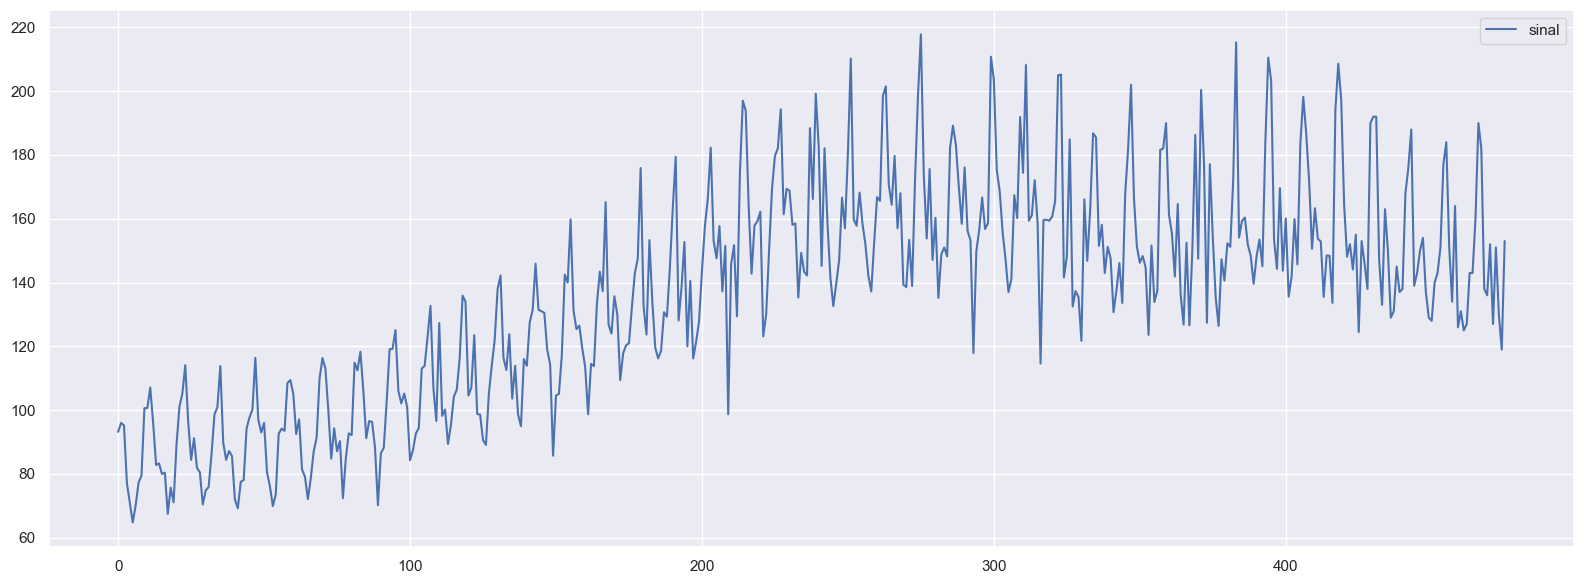

In [5]:
plt.plot(data, label="sinal")
plt.legend()
plt.tight_layout()
plt.show()

### Média móvel simples

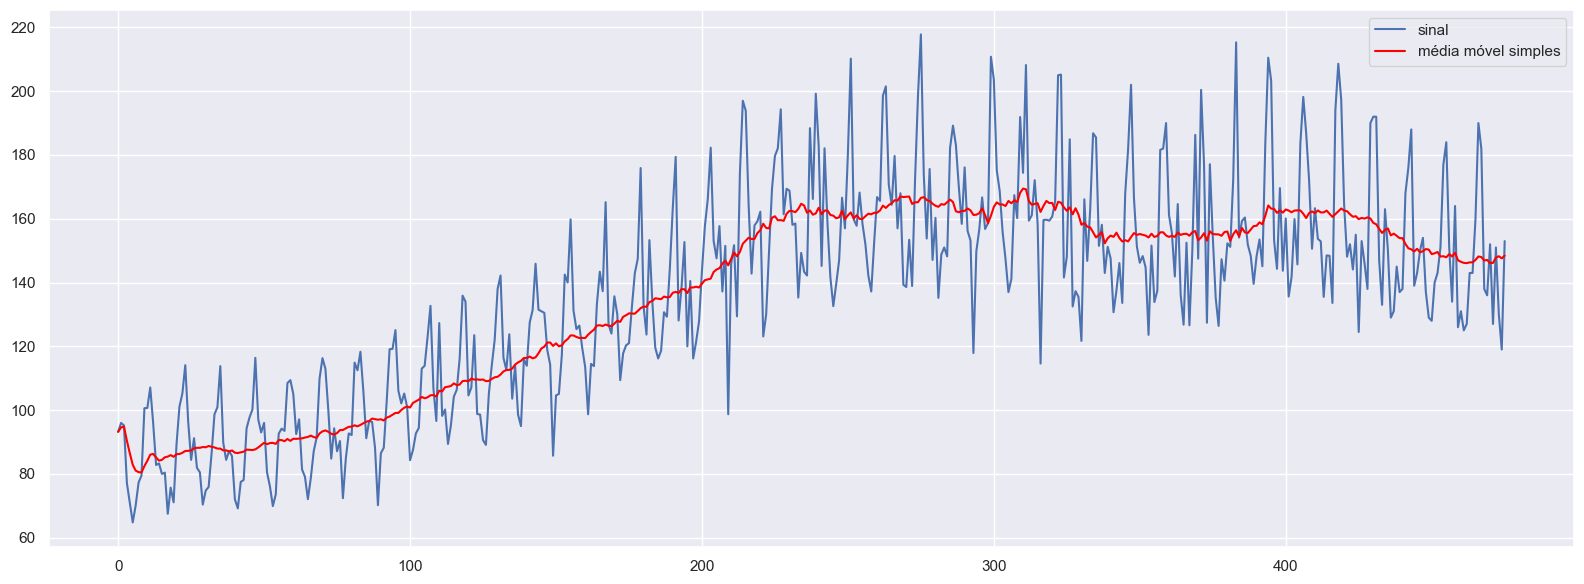

In [11]:
mms = data.rolling(window=12, min_periods=1).mean()

plt.plot(data, label="sinal")
plt.plot(mms, label="média móvel simples", color="red")
plt.legend()
plt.tight_layout()
plt.show()

### Média móvel acumulada

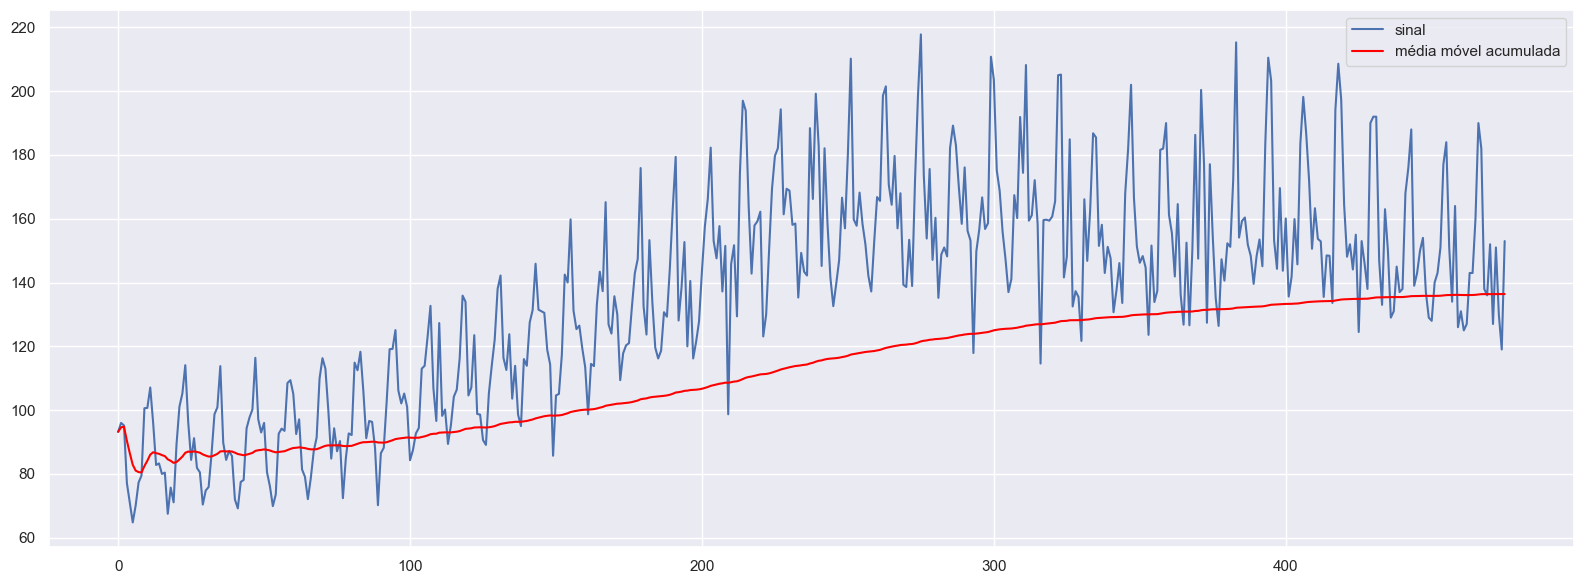

In [13]:
mma = data.expanding().mean()

plt.plot(data, label="sinal")
plt.plot(mma, label="média móvel acumulada", color="red")
plt.legend()
plt.tight_layout()
plt.show()

Média geral: 136.3953781512605


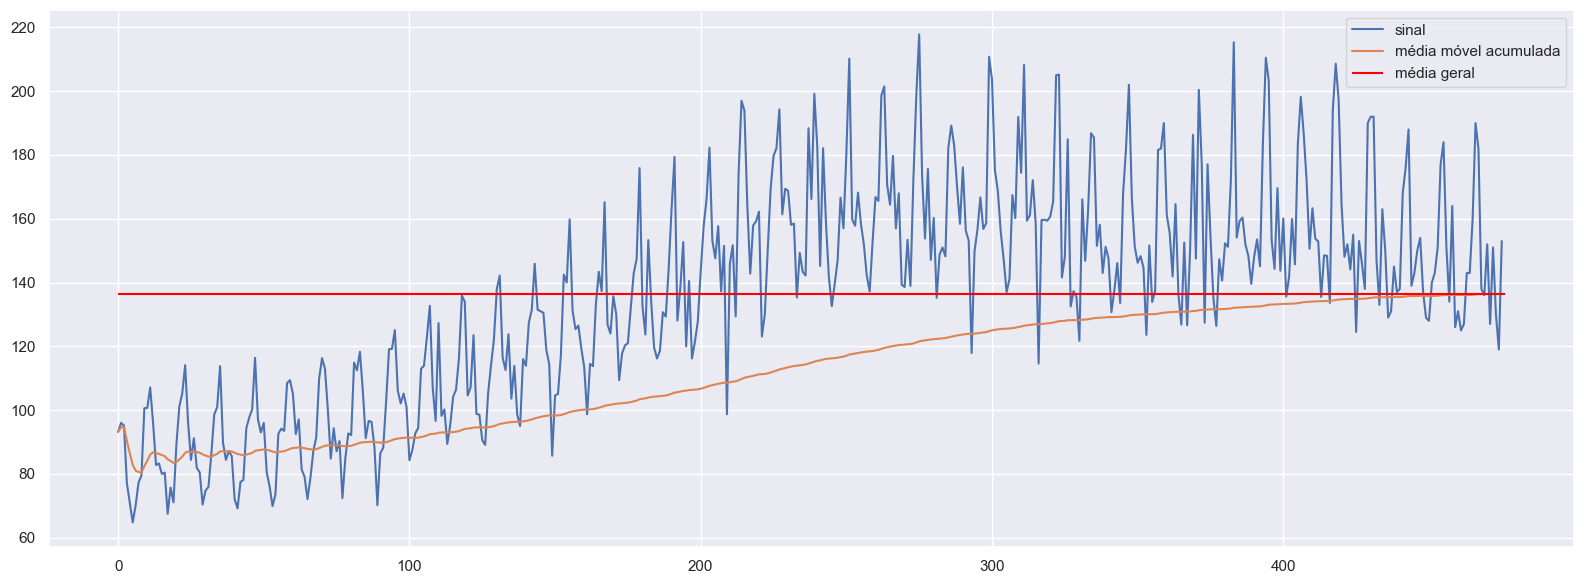

In [14]:
media_geral = np.mean(data)
print("Média geral:", media_geral)

plt.plot(data, label="sinal")
plt.plot(mma, label="média móvel acumulada")
plt.hlines(y=media_geral, xmin=0, xmax=data.shape[0], label="média geral", color="red")
plt.legend()
plt.tight_layout()
plt.show()

### Média ponderada exponencial (ou ponderada)

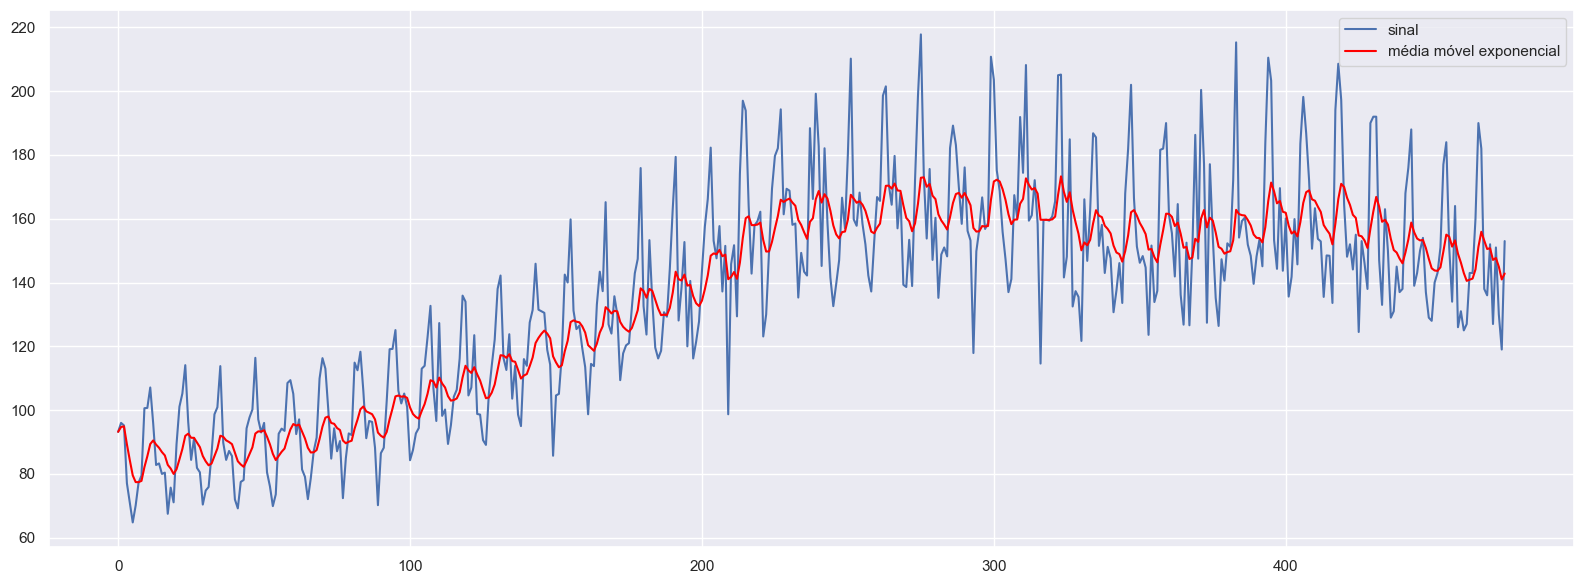

In [15]:
mme = data.ewm(span=12).mean()

plt.plot(data, label="sinal")
plt.plot(mme, label="média móvel exponencial", color="red")
plt.legend()
plt.tight_layout()
plt.show()

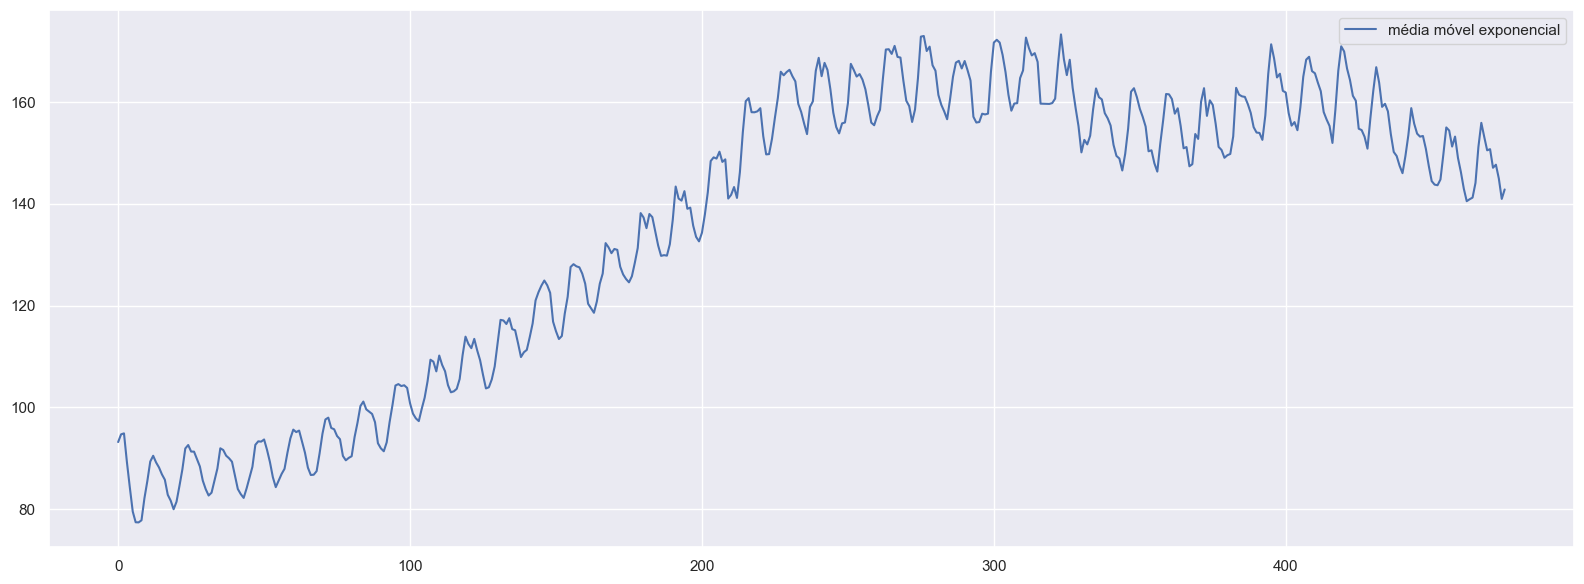

In [16]:
plt.plot(mme, label="média móvel exponencial")
plt.legend()
plt.tight_layout()
plt.show()

## Decomposição: na mão

1. Identificar período da sazonalidade
2. Isolar tendência
3. Isolar sazonalidade + ruído
4. Isolar sazonalidade
5. Isolar ruído

### 1. Identificar período da sazonalidade

### 2. Isolar tendência

### 3. Isolar sazonalidade + ruído

### 4. Isolar sazonalidade

### 5. Isolar ruído

## Decomposição: usando `statsmodels`

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

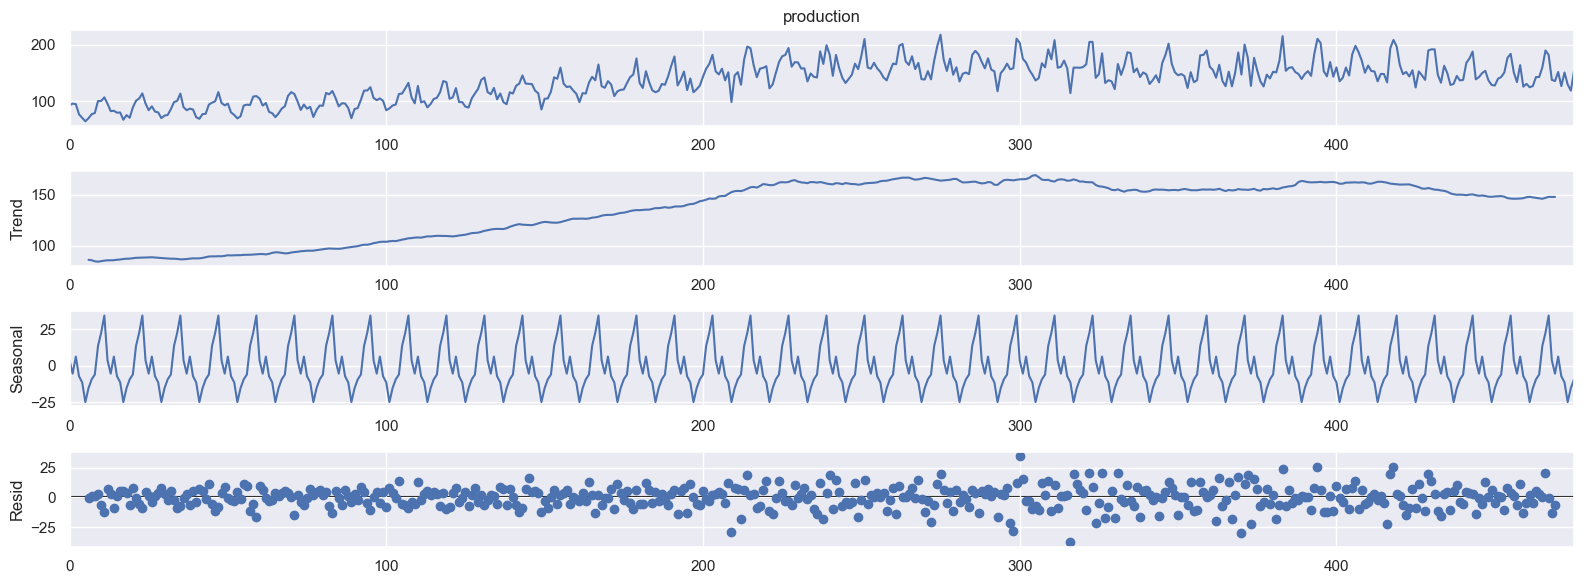

In [18]:
result_add = seasonal_decompose(data, model="additive", period=12)

result_add.plot()
plt.tight_layout()
plt.show()

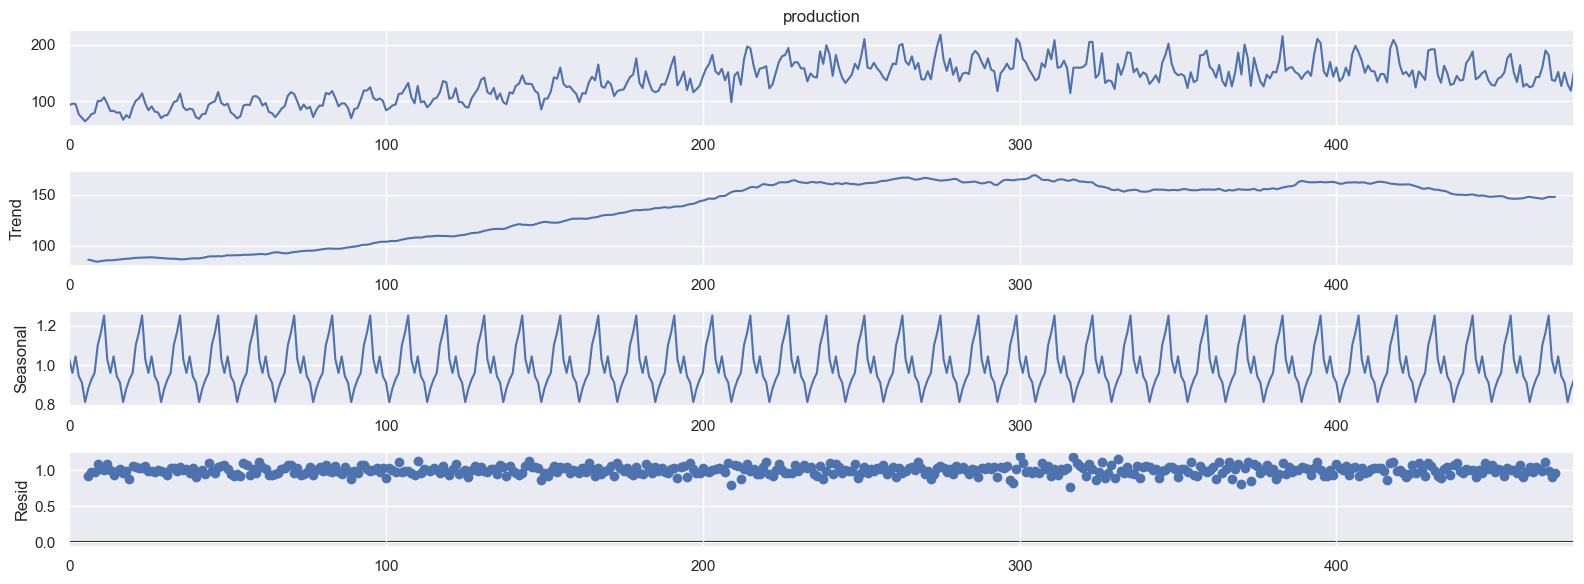

In [19]:
result_mult = seasonal_decompose(data, model="multiplicative", period=12)

result_mult.plot()
plt.tight_layout()
plt.show()